In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from backend import osaka_backend, transpiler_real_backend, sampler_real_backend, service
from utils import save_obj

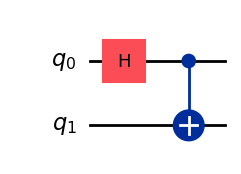

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl', idle_wires=False, fold=-1, filename="test-osaka-bell-state.png")

In [4]:
qc.measure_all()
transpiled_qc = transpiler_real_backend.run(qc)
print(f'qc depth: {qc.depth()}')
print(f'transpiled qc depth: {transpiled_qc.depth()}')

qc depth: 3
transpiled qc depth: 10


In [5]:
job = sampler_real_backend.run([transpiled_qc], shots=1000)
print(f"Job ID: {job.job_id()}")

Job ID: ctj3n6c4gjh0008ntypg


In [6]:
job_data = {"id":job.job_id()}
save_obj(job_data, "bell-state-job.json")

Saving object as JSON...


---

In [2]:
job = service.job("ctj3n6c4gjh0008ntypg")

In [3]:
results = job.result()[0].data.meas.get_counts()
results

{'0010100001110111111100010010001001000010000010010000010111011000011101110101001011100001110100101001001010101010100011100111010': 1,
 '0010110110000010001000001100001001100001010101111111111001011010011100111101111010110000101101010000011000100000010011111101111': 1,
 '0001100001100111111111110011001110101001000000011001100111101011010111101110100000101100101111110111110000100111001111111010110': 1,
 '1111010001010110000111111000000111111110100011100010001111100010010101111110110100011110100101010001111001011001101110100011111': 1,
 '0000101001011101001100000001011011000000000011110100100110111110111010000011111011011001101001001100000110100110011000011101111': 1,
 '0000010101010101101010110010011011010100010111001101101010001110011001100110110101010110010001110010111111011000010010000010101': 1,
 '0101101101110101000001001110111101010110100000111111000001100011000001000101000101011000101101000110101000001110100111100000000': 1,
 '01011000010101100111110000100010010000101000100110011

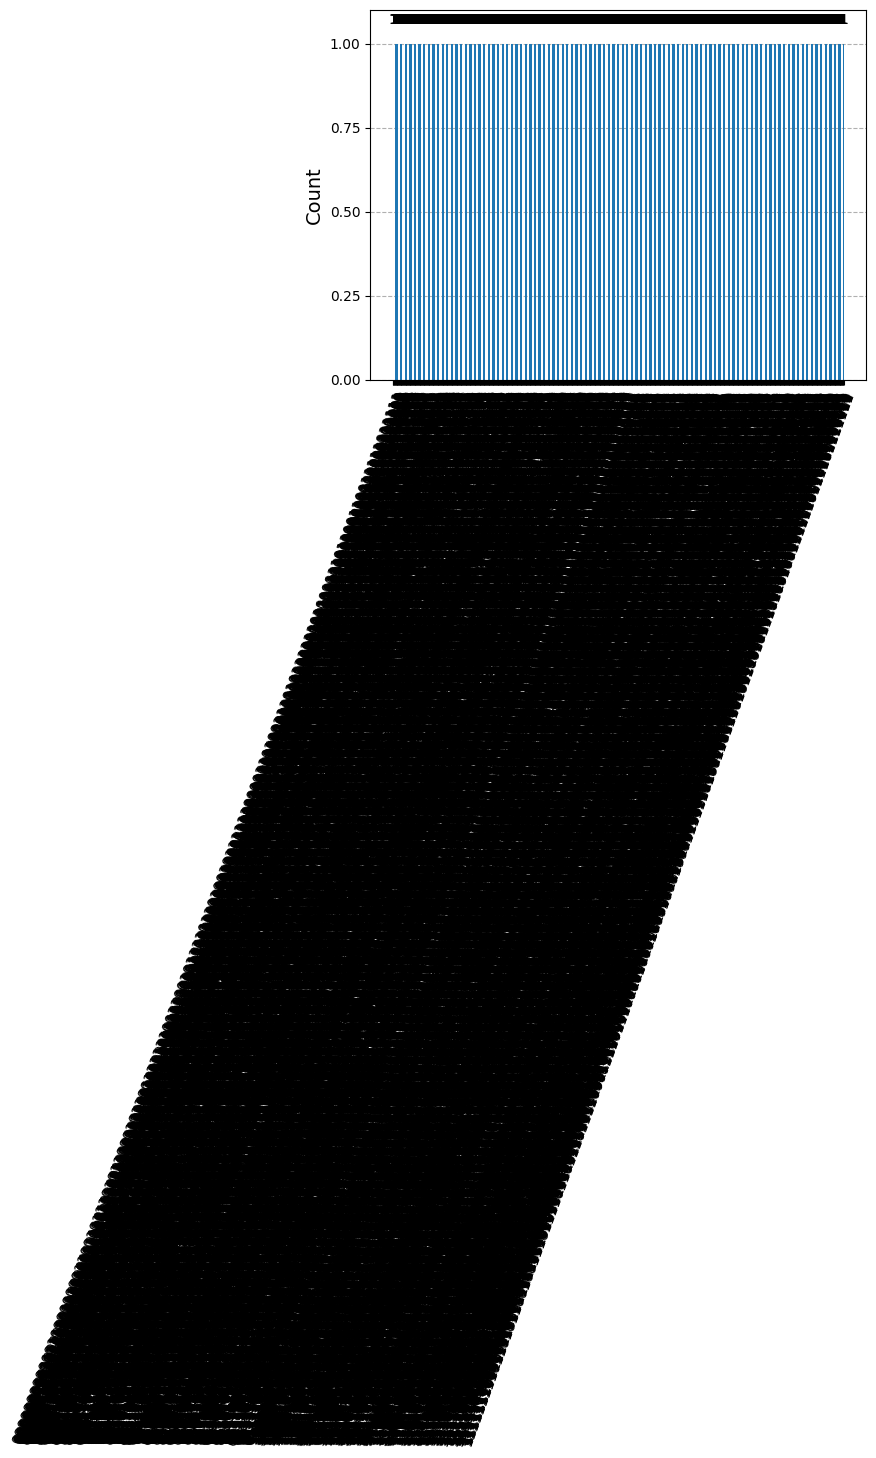

In [4]:
fig = plot_histogram(results)
fig.savefig("bell-state-counts.png", bbox_inches='tight')
display(fig)